In [1]:
import qiskit

In [2]:
qiskit.__version__

'0.46.0'

In [6]:
from qiskit import IBMQ


In [ ]:
from qiskit import *

# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# Apply Hadamard gate to put the qubit in superposition
qc.h(0)

# Measure the qubit in the standard basis
qc.measure(0, 0)

# Simulate the circuit on a local backend
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1024)

# Get the counts from the job
counts = job.result().get_counts(qc)

# Extract the most frequent bit value (0 or 1) as the random number
random_bit = max(counts, key=counts.get)

# Print the random bit (0 or 1)
print("Random bit:", random_bit)


In [7]:
# Import necessary libraries from Qiskit
from qiskit import QuantumCircuit, transpile, assemble, execute,Aer
from qiskit.visualization import plot_histogram


# Create a quantum circuit with one qubit and one classical bit
qc = QuantumCircuit(1, 1)

# Apply a Hadamard gate to the qubit to create a superposition
qc.h(0)

# Measure the qubit
qc.measure(0, 0)

# Use the Aer simulator to run the circuit
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
qobj = assemble(compiled_circuit)
result = simulator.run(qobj).result()

# Get the measurement counts
counts = result.get_counts(qc)

# Print the results
print("Measurement outcomes:", counts)
plot_histogram(counts).show()



C:\Users\20111\AppData\Local\Temp\ipykernel_31904\62069772.py:16: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  simulator = Aer.get_backend('qasm_simulator')
C:\Users\20111\AppData\Local\Temp\ipykernel_31904\62069772.py:19: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj).result()


Measurement outcomes: {'1': 496, '0': 528}


C:\Users\20111\AppData\Local\Temp\ipykernel_31904\62069772.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_histogram(counts).show()


In [ ]:
# Import necessary libraries from Qiskit
from qiskit import QuantumCircuit, Aer, transpile, execute, IBMQ
from qiskit.visualization import plot_histogram, state_visualization
import matplotlib.pyplot as plt

# # Load IBMQ account
# # IBMQ.save_account('YOUR_API_TOKEN')  # Uncomment and replace with your actual API token
# IBMQ.load_account()

# # Get the provider and backend
# provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibmq_quito')  # Replace with an available backend or 'qasm_simulator' for simulation

# Create a quantum circuit with three qubits and three classical bits
qc = QuantumCircuit(3, 3)

# Step 1: Prepare the initial state of qubit 0 (Alice's qubit)
# This can be any arbitrary state. For simplicity, let's prepare a |+> state
qc.h(0)  # Hadamard gate to create a superposition state

# Step 2: Create entanglement between qubit 1 (Alice's entanglement qubit) and qubit 2 (Bob's qubit)
qc.h(1)
qc.cx(1, 2)

# Step 3: Bell measurement on qubits 0 and 1
qc.cx(0, 1)
qc.h(0)
qc.barrier()
qc.measure([0, 1], [0, 1])

# Step 4: Apply corrections to qubit 2 based on measurement outcomes
qc.cx(1, 2)
qc.cz(0, 2)

# Step 5: Measure the final state of qubit 2 (Bob's qubit)
qc.measure(2, 2)

# Transpile and execute the circuit on the chosen backend
compiled_circuit = transpile(qc, backend)
job = backend.run(compiled_circuit)
result = job.result()

# Get the measurement counts
counts = result.get_counts(qc)

# Print the results
print("Measurement outcomes:", counts)

# Plot the histogram
plot_histogram(counts)
plt.show()


In [9]:
# Import necessary libraries from Qiskit
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector

# Create a quantum circuit with two qubits and two classical bits
qc = QuantumCircuit(2, 2)

# Apply various quantum gates
qc.h(0)        # Apply Hadamard gate on qubit 0
qc.cx(0, 1)    # Apply CNOT gate with control qubit 0 and target qubit 1
qc.x(0)        # Apply Pauli-X gate on qubit 0
qc.y(1)        # Apply Pauli-Y gate on qubit 1
qc.z(0)        # Apply Pauli-Z gate on qubit 0

# Measure the qubits
qc.measure([0, 1], [0, 1])

# Draw the quantum circuit
print("Quantum Circuit:")
print(qc.draw())

# Use the Aer simulator to run the circuit
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
qobj = assemble(compiled_circuit)
result = execute(qc, backend=simulator, shots=1024).result()

# Get the measurement counts
counts = result.get_counts(qc)

# Print the results
print("Measurement outcomes:", counts)
plot_histogram(counts).show()

# Use the Aer simulator to get the state vector
statevector_simulator = Aer.get_backend('statevector_simulator')
result_statevector = execute(qc, backend=statevector_simulator).result()
statevector = result_statevector.get_statevector()

# Visualize the state vector on the Bloch sphere
print("Statevector visualization:")
plot_bloch_multivector(statevector).show()


Quantum Circuit:
     ┌───┐     ┌───┐┌───┐┌─┐
q_0: ┤ H ├──■──┤ X ├┤ Z ├┤M├
     └───┘┌─┴─┐├───┤└┬─┬┘└╥┘
q_1: ─────┤ X ├┤ Y ├─┤M├──╫─
          └───┘└───┘ └╥┘  ║ 
c: 2/═════════════════╩═══╩═
                      1   0 
Measurement outcomes: {'11': 494, '00': 530}
Statevector visualization:


C:\Users\20111\AppData\Local\Temp\ipykernel_31904\483597624.py:26: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = execute(qc, backend=simulator, shots=1024).result()
C:\Users\20111\AppData\Local\Temp\ipykernel_31904\483597624.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_histogram(counts).show()
C:\Users\20111\AppData\Local\Temp\ipykernel_31904\483597624.py:37: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, wh

Measurement outcomes: {'0': 508, '1': 516}


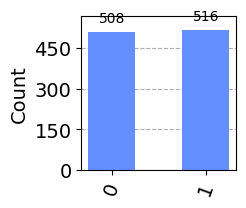

In [25]:
# Import necessary libraries from Qiskit
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute,IBMQ
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt


# Create a quantum circuit with one qubit and one classical bit
qc = QuantumCircuit(1, 1)

# Apply a Hadamard gate to the qubit to create a superposition
qc.h(0)

# Measure the qubit
qc.measure(0, 0)

# Use the Aer simulator to run the circuit
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
# qobj = assemble(compiled_circuit)
# result = simulator.run(qobj).result()
result = simulator.run(compiled_circuit).result()

# Get the measurement counts
counts = result.get_counts(qc)

# Print the results
print("Measurement outcomes:", counts)
%matplotlib inline
plot_histogram(counts,figsize=(2,2))



In [11]:
qc.draw()

┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

In [ ]:
# Import necessary libraries from Qiskit
from qiskit import QuantumCircuit, Aer, transpile, execute, IBMQ
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Ensure matplotlib inline mode is enabled
%matplotlib inline

# Create a quantum circuit with one qubit and one classical bit
qc = QuantumCircuit(1, 1)

# Apply a Hadamard gate to the qubit to create a superposition
qc.h(0)

# Measure the qubit
qc.measure(0, 0)

# Load IBMQ account
IBMQ.save_account('e660cb444ea7fa3af943860a06f893f1e03b8600c7aafac65d4ba9e6664e54e8cae0cf57be4c1308d785a3e0575ca09c4519e482fc07647b9173d95fd0f8aa9a')  # Replace 'YOUR_API_TOKEN' with your actual API token
IBMQ.load_account()

# Get the provider and backend
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibmq_quito')  # Replace with an available backend

# Transpile the circuit for the chosen backend
compiled_circuit = transpile(qc, backend)

# Run the circuit on the real quantum device
job = backend.run(compiled_circuit)

# Get the job result
result = job.result()

# Get the measurement counts
counts = result.get_counts(qc)

# Print the results
print("Measurement outcomes:", counts)

# Plot the histogram
plot_histogram(counts)
plt.show()


In [ ]:
circuit.measure(2,2)
simulator=Aer.get_backend("qasm_simulator")
result=execute(circuit,backend=simulator,shots=1024)

C:\Users\20111\AppData\Local\Temp\ipykernel_23624\1846384406.py:3: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result=execute(circuit,backend=simulator,shots=1024)
